In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch

from sklearn.model_selection import train_test_split

In [44]:
pd.set_option("display.max_columns", 25)

In [45]:
df = pd.read_csv("data/attrition.csv")

In [46]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,...,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,...,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,...,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,...,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,...,12,3,4,80,1,6,3,3,2,2,2,2


In [47]:
df.shape

(1470, 35)

In [26]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

The dataset only contains categorical columns.

In [23]:
categorical_columns = list(set(df.columns) - set("class"))

In [27]:
for category in categorical_columns:
    df[category] = df[category].astype('category')

In [28]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [35]:
categorical_data_list = []

for category in categorical_columns:
    cat_array = df[category].cat.codes.values
    categorical_data_list.append(cat_array)

categorical_data = np.stack(categorical_data_list, 1)

categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[0, 2, 4, 6, 1, 2, 0, 3, 0, 2, 3, 1, 4, 1, 4, 7, 5, 5, 2, 7, 1, 1, 2],
        [0, 2, 4, 0, 0, 3, 0, 2, 0, 2, 2, 1, 4, 0, 9, 7, 5, 1, 2, 7, 1, 1, 2],
        [0, 2, 5, 3, 0, 3, 0, 2, 0, 2, 2, 1, 4, 0, 8, 7, 0, 3, 2, 7, 1, 1, 2],
        [0, 2, 5, 6, 1, 2, 0, 3, 0, 3, 3, 1, 4, 1, 8, 7, 5, 5, 2, 7, 1, 1, 2],
        [1, 2, 4, 5, 0, 3, 1, 3, 0, 2, 0, 0, 0, 0, 3, 7, 5, 1, 2, 7, 1, 1, 2],
        [0, 2, 5, 0, 0, 2, 0, 2, 0, 3, 2, 1, 4, 0, 9, 7, 5, 1, 2, 7, 1, 1, 2],
        [0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 4, 0, 8, 7, 0, 3, 2, 7, 1, 1, 2],
        [0, 2, 5, 3, 0, 3, 0, 2, 0, 3, 3, 1, 4, 0, 8, 7, 0, 3, 2, 7, 1, 1, 2],
        [0, 2, 7, 6, 1, 2, 0, 3, 0, 3, 4, 1, 4, 1, 8, 7, 5, 1, 2, 7, 1, 1, 2],
        [0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 3, 1, 4, 0, 9, 7, 0, 3, 2, 7, 1, 1, 2]])

In [39]:
class_encoding = {
    "e": 0,
    "p": 1}

df["class"].replace(class_encoding, inplace=True)

In [41]:
target = torch.tensor(df["class"].values).flatten()
target[:5]

tensor([1, 0, 0, 1, 0])

In [42]:
# Determine the embedding size for all categorical columns
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

NameError: name 'dataset' is not defined

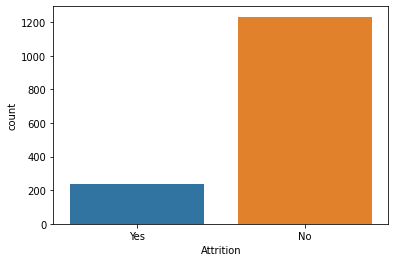

In [48]:
sns.countplot(x="Attrition", data=df)

In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001